In [1]:
from sklearn.datasets import make_circles

In [2]:
X,y = make_circles(n_samples=1000, noise=.04)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Fig A')

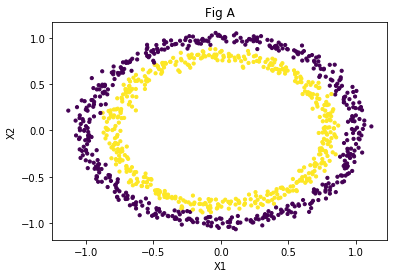

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Fig A')

In [6]:
import numpy as np

* Converting data to higher degree
* We can also use polynomialfeature transformer

In [7]:
n_X = np.square(X)

Text(0.5, 1.0, 'Fig B')

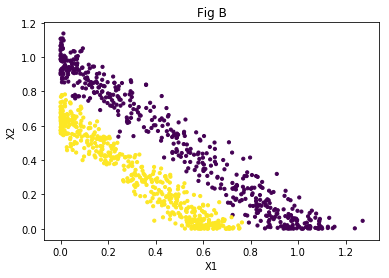

In [11]:
plt.scatter(n_X[:,0],n_X[:,1],c=y,s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Fig B')

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

* Trained model with new transformed data

In [14]:
lr.fit(n_X,y)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

* Generating data for entire space

In [16]:
X = n_X

In [17]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [18]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

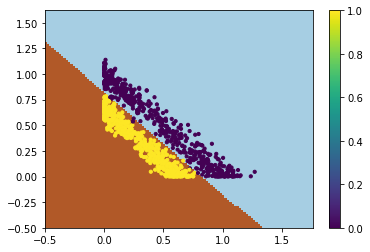

In [20]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.colorbar()

### More topics to be covered
* Effect of polynomial transformation
* Impact of outliers
* Outlier resistent Linear Models

In [21]:
import pandas as pd

/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [24]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [48]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [26]:
feature_data =  house_data[['Sqft','Bedroom']]

In [27]:
target_data = house_data.Price

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

* We don't know which form of these features are better for correct prediction
* So, we have to try it out

In [30]:
from sklearn.model_selection import train_test_split

* Trying this out with degree 1 that means we are not deriving new features from existing ones

In [31]:
trainX, testX, trainY, testY = train_test_split(feature_data, target_data)

In [32]:
lr.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr.score(testX,testY)

0.666020133562698

* Trying for degree 2 features

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
pol = PolynomialFeatures(degree=2)

In [36]:
feature_data_n = pol.fit_transform(feature_data)

In [38]:
trainX, testX, trainY, testY = train_test_split(feature_data_n, target_data)

In [39]:
lr.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lr.score(testX,testY)

0.7380767905511437

#### Better way to do this

In [47]:
for deg in range(1,6):
    pol = PolynomialFeatures(degree=deg)
    feature_data_n = pol.fit_transform(feature_data)
    trainX, testX, trainY, testY = train_test_split(feature_data_n, target_data)
    lr = LinearRegression()
    lr.fit(trainX, trainY)
    print ('Degree ', deg, 'Train Acc', np.round(lr.score(trainX,trainY),2))
    print ('Degree ', deg, 'Test Acc', np.round(lr.score(testX,testY),2))
    print ('-')

Degree  1 Train Acc 0.68
Degree  1 Test Acc 0.68
-
Degree  2 Train Acc 0.67
Degree  2 Test Acc 0.71
-
Degree  3 Train Acc 0.72
Degree  3 Test Acc 0.67
-
Degree  4 Train Acc 0.72
Degree  4 Test Acc 0.49
-
Degree  5 Train Acc 0.73
Degree  5 Test Acc 0.67
-


* Adding more features

In [50]:
feature_data =  house_data[['Sqft','Bedroom','Floor','Living.Room']]
for deg in range(1,6):
    pol = PolynomialFeatures(degree=deg)
    feature_data_n = pol.fit_transform(feature_data)
    trainX, testX, trainY, testY = train_test_split(feature_data_n, target_data)
    lr = LinearRegression()
    lr.fit(trainX, trainY)
    print ('Degree ', deg, 'Train Acc', np.round(lr.score(trainX,trainY),2))
    print ('Degree ', deg, 'Test Acc', np.round(lr.score(testX,testY),2))
    print ('-')

Degree  1 Train Acc 0.72
Degree  1 Test Acc 0.6
-
Degree  2 Train Acc 0.71
Degree  2 Test Acc 0.67
-
Degree  3 Train Acc 0.69
Degree  3 Test Acc -0.44
-
Degree  4 Train Acc 0.82
Degree  4 Test Acc -2.99
-
Degree  5 Train Acc 0.78
Degree  5 Test Acc -39.87
-


#### Impact of Outliers on Linear Models
* Outliers are data that doesn't fit the general trend

In [99]:
from sklearn.datasets import make_regression
X,y = make_regression(n_features=1, n_samples=100, noise=20)

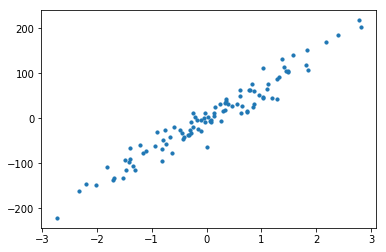

In [100]:
plt.scatter(X,y,s=10)

* Add some outliers in the data

In [101]:
lr = LinearRegression()
lr.fit(X,y)
o_wo = lr.predict(X)

In [102]:
X[:10] = X[:10]+2

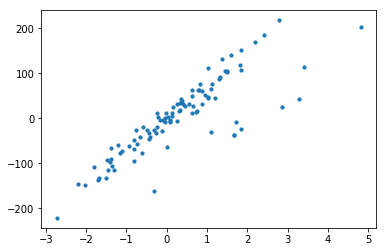

In [103]:
plt.scatter(X,y,s=10)

* Should ML models be impacted by outliers?
* A. ML models should depict general behaviour. A good ML solution will not be impact by outliers.

In [104]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
o = lr.predict(X)

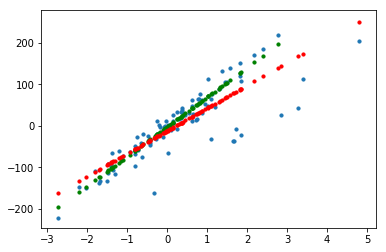

In [106]:
plt.scatter(X,y,s=10)
plt.scatter(X[10:],o_wo[10:],s=10,c='g')
plt.scatter(X,o,s=10,c='r')

### Interview Alert
* Why does outliers impact linear models?
* A. GD will try to find the line in such a way that the cumilative loss is minimal & outliers contribute heavily to the loss

#### Dealing with outlier data
* Filter the data during data cleaning
* Using basic statistics to identify that
* Advanced Linear models to deal with this

In [86]:
from sklearn.linear_model import RANSACRegressor

In [107]:
rs_lr = RANSACRegressor()

In [108]:
rs_lr.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [109]:
o_rs = rs_lr.predict(X)

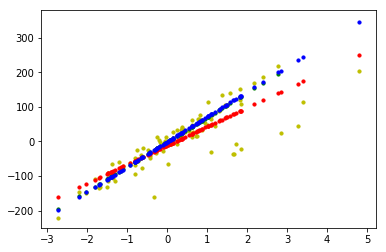

In [110]:
plt.scatter(X,y,s=10,c='y')
plt.scatter(X[10:],o_wo[10:],s=10,c='g')
plt.scatter(X,o,s=10,c='r')
plt.scatter(X,o_rs,s=10,c='b')

### Journey Ahead
* Feature Selection & Dimensionality Reduction
* Naive Bayes
* Hyper-parameter Tuning
* Pipeline & ColumnTransformer